# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/My Drive/Colab Notebooks/dataset')

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


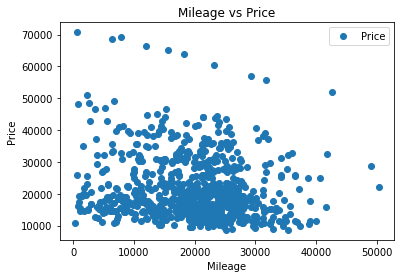

In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Find the linear regression equation for mileage vs price.

In [ ]:
X=df['Mileage']
X = X.to_frame()
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c
print(regressor.coef_)

21257.24104395476
[-1644.22816013]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([20795.18773794, 24028.94785622, 18287.13535596, 19683.96664965,
       24661.60064547, 17413.58707611, 23287.52954445, 18690.37345978,
       18807.19568766, 16661.69504737, 20145.61586741, 17395.25807139,
       20680.17826877, 21738.02368398, 18645.05449206, 19973.20237247,
       20331.92717911, 21004.05782469, 20074.51544251, 20732.74827132,
       21832.28713682, 21413.33845753, 22288.69949609, 21583.13352322,
       20651.77838234, 22323.94758208, 19345.1821888 , 22274.60026169,
       20084.58632422, 19706.52542469, 20630.62953074, 21521.70114477,
       21910.23576129, 21128.93675794, 23720.57745814, 23497.20530173,
       21129.3395932 , 24680.53390309, 21255.62844989, 23898.63064684,
       20956.72468063, 21269.12343139, 22577.9352189 , 22505.42487057,
       21211.92082326, 22920.14377954, 24323.42043753, 21595.62141655,
       25024.9580577 , 23967.31406013, 22347.71486293, 23579.58511415,
       22330.59436402, 21451.60780804, 22475.21222542, 20292.44932279,
      

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.013823003638400166


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Features are mileage, cylinders, liters, doors, cruise, sound, and leather

In [ ]:
X=df.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
X

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [ ]:
y=df.loc[:,['Price']]
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


split the data into train test part

In [ ]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
X_test

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
207,22169,4,1.6,4,0,0,1
330,6114,4,2.2,4,1,1,1
199,34621,4,1.6,4,0,1,0
648,27686,4,2.0,4,1,0,0
620,2973,4,1.8,4,0,0,0
...,...,...,...,...,...,...,...
236,22771,4,2.2,2,0,1,1
483,19521,8,4.6,4,1,1,1
281,12305,4,2.2,4,1,1,1
580,9185,8,5.7,2,1,1,1


fitting model

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

Predicting Parameters

In [ ]:
print(regressor.intercept_) # c
print(regressor.coef_)

[6935.95906985]
[[-1.95574397e-01  4.01633109e+03 -1.02646571e+03 -1.56063080e+03
   6.31852670e+03 -2.34745572e+03  3.66051602e+03]]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[14441.24231852],
       [20936.38082242],
       [ 5997.9781791 ],
       [15609.68276958],
       [14329.67929041],
       [10002.60991337],
       [20113.82489452],
       [18100.13714363],
       [31152.13084591],
       [30505.92435957],
       [17545.4365017 ],
       [26354.17241847],
       [35318.23289176],
       [19091.64768758],
       [18829.93877758],
       [30600.10142952],
       [23942.22295257],
       [24389.56157459],
       [34730.14067877],
       [19749.30025463],
       [19183.17650556],
       [27339.71761663],
       [19626.34809008],
       [12242.99421042],
       [17554.53833009],
       [25979.10031395],
       [19118.29481902],
       [19232.92782103],
       [23804.70416362],
       [21816.61101236],
       [11934.00231144],
       [25200.12748909],
       [21814.22791207],
       [18120.5006486 ],
       [21016.68648122],
       [10851.60797462],
       [26858.66457417],
       [27037.78132018],
       [24941.77371012],
       [30732.00912167],


R2 score

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4327066432439929


By scaling data using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test_scaled)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4327066432439928


Both R2 score are same scaling and without scaling

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

In [ ]:
X=df.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y=df.loc[:,["Price"]]
X

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.3, random_state = 0)

In [ ]:
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
y_predict_dummy_median = lm_dummy_median.predict(X_test)

In [ ]:
print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test, 
                                                                    y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [[-1.76691421e-01  3.49049625e+03 -1.84154495e+02 -1.26870328e+03
   6.30539132e+03 -2.00436670e+03  3.77474047e+03]]
Mean squared error (dummy): 87475756.89
Mean squared error (linear model): 55270888.79
Median absolute error (dummy): 4272.16
Median absolute error (linear model): 5733.44
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.11
r2_score (linear model): 0.37


# Find the best combination of factors to predict price

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


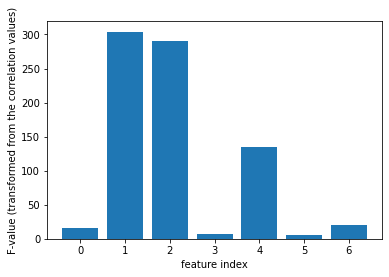

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

best features are Cylinder,Liter,Cruise,Leather,Mileage,Doors,Sound.

In [ ]:
X.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')